In [10]:
from datasets import FaceKeyPointDataset
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torch.nn as nn
import random

seed = 42

torch.manual_seed(seed)
random.seed(seed)


# Трансформации для train
train_transform = A.Compose([
    # A.Resize(256, 256),
    # A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    # # A.Rotate(limit=10, p=0.3),
    A.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},  # Сдвиг
        scale=(0.8, 1.2),  # Масштабирование
        rotate=(-10, 10),  # Поворот
        p=0.3
    ),
    A.GaussianBlur(blur_limit=(3, 7), p=0.1),
    A.HueSaturationValue(p=0.3),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

# Трансформации для val
val_transform = A.Compose([
    # A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
], keypoint_params=A.KeypointParams(format='xy'))



d:\projects\face_keypoints\.venv\Lib\site-packages\albumentations\core\composition.py:331: UserWarning: Got processor for keypoints, but no transform to process it.
  self._set_keys()


In [11]:
%matplotlib inline

In [12]:
def create_data_loaders(images_dir, json_path, batch_size=16, train=True):
    if train:
        transform = train_transform
    else:
        transform = val_transform

    dataset = FaceKeyPointDataset(images_dir, json_path, transform=transform)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=train, num_workers=0)
    return data_loader

In [13]:
train_loader = create_data_loaders("./train/images", "./train/data.json", batch_size=32)
val_loader = create_data_loaders("./test/images", "./test/data.json", batch_size=32, train=False)

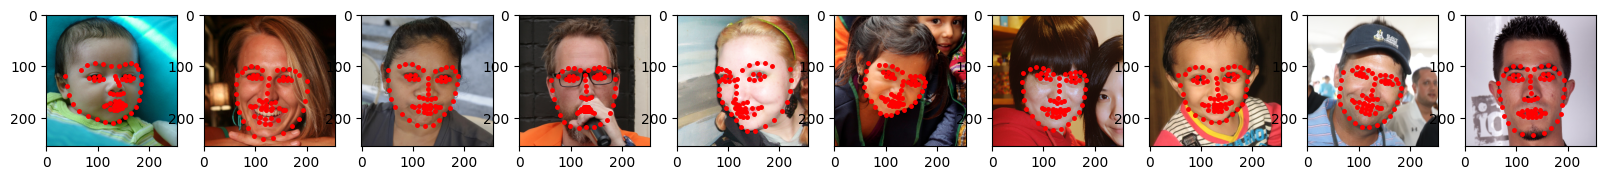

In [14]:
import matplotlib.pyplot as plt

show_dataset = FaceKeyPointDataset("./train/images", "./train/data.json", transform=None)

plt.figure(figsize=(20, 15))


for i in range(10):
    image, landmarks = show_dataset[i]

    landmarks = [x * 256 for x in landmarks[::2]] + [y * 256 for y in landmarks[1::2]]
    
    axes = plt.subplot(1, 10, i + 1)
    # Наносим точки
    for x, y in landmarks:
        axes.plot(x, y, 'r.', markersize=5)
    axes.imshow(image)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877123].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.6399999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2565577].


Compose([
  RandomBrightnessContrast(p=0.3, brightness_by_max=True, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), ensure_safe_range=False),
  Affine(p=0.3, balanced_scale=False, border_mode=0, fill=0.0, fill_mask=0.0, fit_output=False, interpolation=1, keep_ratio=False, mask_interpolation=0, rotate=(-10.0, 10.0), rotate_method='largest_box', scale={'x': (0.8, 1.2), 'y': (0.8, 1.2)}, shear={'x': (0.0, 0.0), 'y': (0.0, 0.0)}, translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}, translate_px=None),
  GaussianBlur(p=0.1, blur_limit=(3, 7), sigma_limit=(0.5, 3.0)),
  HueSaturationValue(p=0.3, hue_shift_limit=(-20.0, 20.0), sat_shift_limit=(-30.0, 30.0), val_shift_limit=(-20.0, 20.0)),
  Normalize(p=1.0, max_pixel_value=255.0, mean=(0.485, 0.456, 0.406), normalization='standard', std=(0.229, 0.224, 0.225)),
  ToTensorV2(p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params={'format': 'xy', 'label_fields': None, 'remove_invisible': False, 'angle_in_degrees':

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0822659].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9809059..2.5354247].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2

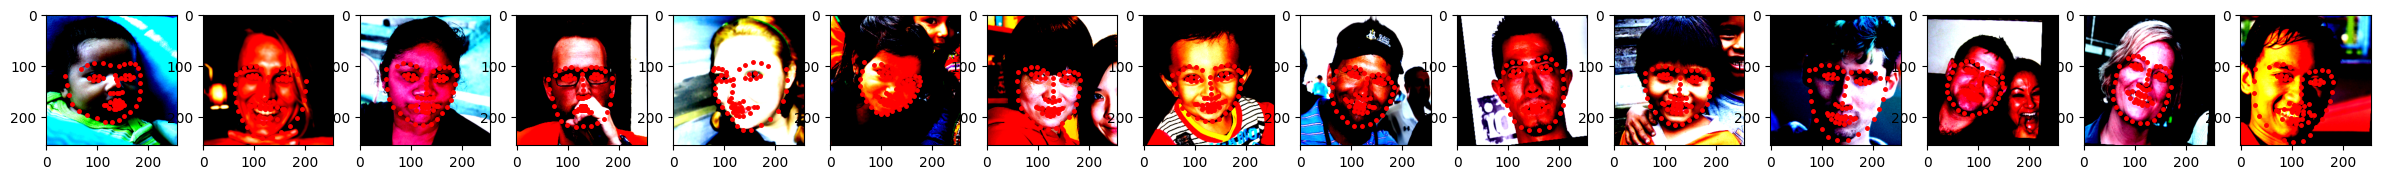

In [15]:
import numpy as np
train_dataset = FaceKeyPointDataset("./train/images", "./train/data.json", transform=train_transform)

plt.figure(figsize=(30, 15))

print(train_dataset.transform)

for i in range(15):
    image, landmarks = train_dataset[i]
    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  # Теперь форма (512, 512, 3)
    
    axes = plt.subplot(1, 15, i + 1)
    # Наносим точки
    landmarks = [x * 256 for x in landmarks[::2]] + [y * 256 for y in landmarks[1::2]]

    for x, y in landmarks:
        axes.plot(x, y, 'r.', markersize=5)
    axes.imshow(image)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2216992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5125438].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4134204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


[[0.3883596  0.49959165]
 [0.42010528 0.6686252 ]
 [0.5567455  0.82295775]
 [0.8194576  0.7273899 ]
 [0.9024433  0.4716671 ]
 [0.4392708  0.43323606]
 [0.66675407 0.409896  ]
 [0.5073532  0.53980994]
 [0.49197197 0.64905083]
 [0.40894914 0.4857212 ]
 [0.46086115 0.5055539 ]
 [0.67459154 0.47740224]
 [0.4856482  0.67305243]
 [0.5548858  0.68134224]
 [0.5639556  0.7357871 ]
 [0.49890816 0.6830886 ]
 [0.6513629  0.69132376]
 [0.38115203 0.54371554]
 [0.4519406  0.7076479 ]
 [0.61608917 0.828557  ]
 [0.8602483  0.6715    ]
 [0.3743229  0.43325755]
 [0.46611935 0.4498255 ]
 [0.72593343 0.41723683]
 [0.4985447  0.5793903 ]
 [0.51670676 0.6557772 ]
 [0.43079102 0.46933335]
 [0.42565727 0.50223225]
 [0.7122576  0.49764782]
 [0.49353045 0.67555314]
 [0.60702443 0.6880188 ]
 [0.536634   0.7349662 ]
 [0.5121681  0.69312483]
 [0.5587846  0.7045514 ]
 [0.37938434 0.5839601 ]
 [0.48671126 0.74782604]
 [0.6861907  0.80618066]
 [0.8864446  0.60896206]
 [0.38510066 0.41582575]
 [0.56021625 0.4420122 ]


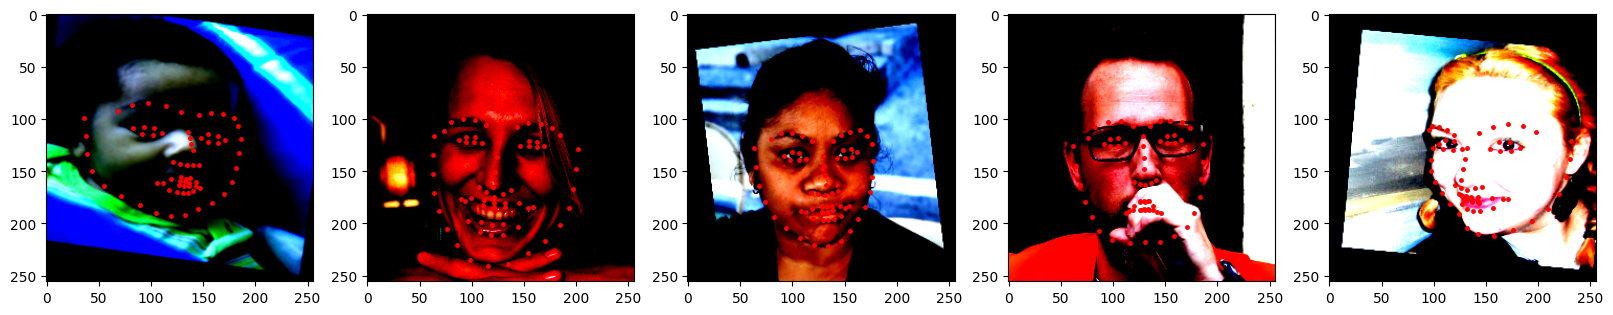

In [16]:
val_dataset = FaceKeyPointDataset("./test/images", "./test/data.json", transform=val_transform)

plt.figure(figsize=(20, 15))

for i in range(5):
    image, landmarks = train_dataset[i]
    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  # Теперь форма (512, 512, 3)
    
    axes = plt.subplot(1, 5, i + 1)
    # Наносим точки
    if i == 4:
        print(landmarks)
    landmarks = [x * 256 for x in landmarks[::2]] + [y * 256 for y in landmarks[1::2]]

    for x, y in landmarks:
        axes.plot(x, y, 'r.', markersize=5)
    axes.imshow(image)

plt.show()

In [17]:
import torchvision.models as models

base_model = models.mobilenet_v3_large(pretrained=True)

# Удаляем последний линейный слой (classifier)
# В MobileNetV3 последний слой — это classifier
# Структура модели:
print(base_model.classifier)

# Уберём классификатор и оставим только feature extractor
for name, module in base_model.named_children():
    if name == "classifier":
        break

num_landmarks = 68  
num_ftrs = base_model.classifier[0].in_features

class LandmarkModel(nn.Module):
    def __init__(self, base_model, num_landmarks):
        super().__init__()
        self.base = nn.Sequential(*list(base_model.children())[:-1])  # Все кроме classifier
        self.regressor = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, num_landmarks * 2)
        )
        
    def forward(self, x):
        x = self.base(x)
        x = x.view(x.size(0), -1)  
        x = self.regressor(x)
        return x


Sequential(
  (0): Linear(in_features=960, out_features=1280, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1280, out_features=1000, bias=True)
)


d:\projects\face_keypoints\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\projects\face_keypoints\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LandmarkModel(base_model, num_landmarks).to(device)
# model = LandmarkModel().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    factor=0.1,
    mode = 'min',
    patience=3
)

criterion = nn.MSELoss()  

In [20]:
import os

def load_checkpoint(ck_path: str, train_continue: bool = True):
    """
    ck_path - путь до папки с чекпоинтами
    create or load trainig state (models, optimizer, scheduler, epoch)
    """

    if os.path.exists(ck_path) and os.listdir(ck_path) and train_continue:
        last_chekpoint = sorted(os.listdir(ck_path), key=lambda x: int(x.split('.')[0].split('_')[-1]))[-1]
        checkpoint = torch.load(f"{ck_path}/{last_chekpoint}")
        print(f"load checkpoint success {ck_path}/{last_chekpoint}")
        return checkpoint
    else:
        os.makedirs(ck_path, exist_ok=True)

        return None

def initialize_from_ck(checkpoint, model, optimizer, scheduler):
    model.load_state_dict(checkpoint['model_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    return checkpoint['epoch']


CHECKPOINT_PATH = './checkpoints'
checkpoint = load_checkpoint(CHECKPOINT_PATH, train_continue = True)

if checkpoint is None:
    start_epoch = 0
else:
    start_epoch = initialize_from_ck(checkpoint, model, optimizer, scheduler)


print(f"continue training from epoch {start_epoch}")


load checkpoint success ./checkpoints/checkpoint_epoch_30.ckpt
continue training from epoch 30


In [21]:
import csv

class LoggerCSV:
    def __init__(self, logs_path: str):
        os.makedirs(logs_path, exist_ok=True)
        self.csv_file = os.path.join(logs_path, f'exp_loss.csv')

        self._create_csv()
         
    def append(self, epoch, train_loss, val_loss) -> None:
            # Записываем в CSV
        with open(self.csv_file, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([epoch, train_loss, val_loss])

    def clear_logs(self):
        with open(self.csv_file, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Epoch', 'Train Loss', 'Val Loss'])

    def _create_csv(self) -> None:
        if not os.path.exists(self.csv_file):
            with open(self.csv_file, 'w', newline='') as f:
                writer = csv.writer(f)
                writer.writerow(['Epoch', 'Train Loss', 'Val Loss'])


In [13]:
from tqdm import tqdm

def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    bar = tqdm(dataloader)

    for images, landmarks in bar:
        images = images.to(device)
        landmarks = landmarks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        batch_size = landmarks.shape[0]

        # print(landmarks)

        landmarks_reshaped = landmarks.reshape(batch_size, -1)

        loss = criterion(outputs, landmarks_reshaped)
        bar.set_postfix({'Loss': loss.item()})

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)

    return epoch_loss

def validate_model(model, dataloader, device):
    model.eval()
    running_loss = 0.0

    bar = tqdm(dataloader)

    with torch.no_grad():
        for images, landmarks in bar:
            images = images.to(device)
            landmarks = landmarks.to(device)

            outputs = model(images)
            batch_size = landmarks.shape[0]

            landmarks_reshaped = landmarks.reshape(batch_size, -1)

            loss = criterion(outputs, landmarks_reshaped)
            bar.set_postfix({'Loss': loss.item()})

            running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)

    return epoch_loss


def save_checkpoint(model, optimizer, scheduler, epoch, checkpoint_path):
    checkpoint = {
        'model_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'epoch': epoch,
    }

    os.makedirs(checkpoint_path, exist_ok=True)
    torch.save(checkpoint, f'{checkpoint_path}/checkpoint_epoch_{epoch}.ckpt')


num_epochs = 100

best_loss = float("inf")

logger = LoggerCSV("./logs")

if start_epoch == 0:
    logger.clear_logs()

counter = 0

for epoch in range(start_epoch, num_epochs):

    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss = validate_model(model, val_loader, device)

    print(f"epoch {epoch} train loss: {train_loss:.5f} validate loss: {val_loss:.5f}", end='')

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        counter = 0
    else:
        counter += 1
        if counter > 15:
            print("Early stopping exit")
            break

    scheduler.step(val_loss)

    save_checkpoint(model, optimizer, scheduler, epoch, CHECKPOINT_PATH)
    logger.append(epoch, train_loss, val_loss)
    



100%|██████████| 32/32 [00:14<00:00,  2.23it/s, Loss=0.00465]


epoch 0 train loss: 0.06254 validate loss: 0.02990

100%|██████████| 32/32 [00:07<00:00,  4.43it/s, Loss=0.00308]


epoch 1 train loss: 0.02987 validate loss: 0.00321

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.00181]


epoch 2 train loss: 0.01571 validate loss: 0.00144

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.00144] 


epoch 3 train loss: 0.00971 validate loss: 0.00124

100%|██████████| 32/32 [00:07<00:00,  4.43it/s, Loss=0.00143] 


epoch 4 train loss: 0.00774 validate loss: 0.00119

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.0013]  


epoch 5 train loss: 0.00783 validate loss: 0.00112

100%|██████████| 32/32 [00:07<00:00,  4.44it/s, Loss=0.00143] 


epoch 6 train loss: 0.00796 validate loss: 0.00132

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.00126] 


epoch 7 train loss: 0.00613 validate loss: 0.00106

100%|██████████| 32/32 [00:07<00:00,  4.38it/s, Loss=0.00104] 


epoch 8 train loss: 0.00524 validate loss: 0.00106

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.0011]  


epoch 9 train loss: 0.00393 validate loss: 0.00096

100%|██████████| 32/32 [00:07<00:00,  4.40it/s, Loss=0.000753]


epoch 10 train loss: 0.00337 validate loss: 0.00072

100%|██████████| 32/32 [00:07<00:00,  4.33it/s, Loss=0.000748]


epoch 11 train loss: 0.00310 validate loss: 0.00067

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.000634]


epoch 12 train loss: 0.00288 validate loss: 0.00062

100%|██████████| 32/32 [00:07<00:00,  4.44it/s, Loss=0.000775]


epoch 13 train loss: 0.00278 validate loss: 0.00073

100%|██████████| 32/32 [00:07<00:00,  4.45it/s, Loss=0.000594]


epoch 14 train loss: 0.00277 validate loss: 0.00054

100%|██████████| 32/32 [00:07<00:00,  4.40it/s, Loss=0.000614]


epoch 15 train loss: 0.00274 validate loss: 0.00049

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.000488]


epoch 16 train loss: 0.00256 validate loss: 0.00052

100%|██████████| 32/32 [00:07<00:00,  4.43it/s, Loss=0.000597]


epoch 17 train loss: 0.00253 validate loss: 0.00060

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.000504]


epoch 18 train loss: 0.00247 validate loss: 0.00049

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.000469]


epoch 19 train loss: 0.00238 validate loss: 0.00047

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.000647]


epoch 20 train loss: 0.00227 validate loss: 0.00052

100%|██████████| 32/32 [00:07<00:00,  4.43it/s, Loss=0.000592]


epoch 21 train loss: 0.00225 validate loss: 0.00045

100%|██████████| 32/32 [00:07<00:00,  4.42it/s, Loss=0.000443]


epoch 22 train loss: 0.00222 validate loss: 0.00042

100%|██████████| 32/32 [00:07<00:00,  4.38it/s, Loss=0.000527]


epoch 23 train loss: 0.00214 validate loss: 0.00048

100%|██████████| 32/32 [00:07<00:00,  4.43it/s, Loss=0.000426]


epoch 24 train loss: 0.00216 validate loss: 0.00046

100%|██████████| 32/32 [00:07<00:00,  4.40it/s, Loss=0.000479]


epoch 25 train loss: 0.00210 validate loss: 0.00046

100%|██████████| 32/32 [00:07<00:00,  4.40it/s, Loss=0.00069] 


epoch 26 train loss: 0.00208 validate loss: 0.00057

100%|██████████| 32/32 [00:07<00:00,  4.38it/s, Loss=0.00021] 


epoch 27 train loss: 0.00167 validate loss: 0.00026

100%|██████████| 32/32 [00:07<00:00,  4.41it/s, Loss=0.000215]


epoch 28 train loss: 0.00146 validate loss: 0.00026

100%|██████████| 32/32 [00:07<00:00,  4.40it/s, Loss=0.000206]


epoch 29 train loss: 0.00136 validate loss: 0.00026

100%|██████████| 32/32 [00:07<00:00,  4.44it/s, Loss=0.000214]


epoch 30 train loss: 0.00127 validate loss: 0.00027

 10%|█         | 13/125 [00:03<00:34,  3.26it/s, Loss=0.00138]


KeyboardInterrupt: 

<Axes: >

<Figure size 1000x600 with 0 Axes>

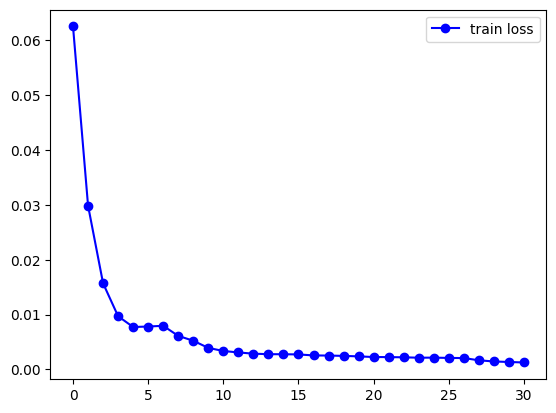

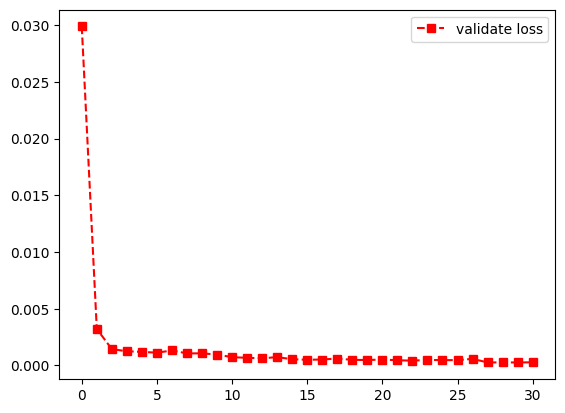

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./logs/exp_loss.csv")

plt.figure(figsize=(10, 6))

df.plot(y='Train Loss', label='train loss', marker='o', linestyle='-', color='blue')
df.plot(y='Val Loss', label='validate loss', marker='s', linestyle='--', color='red')

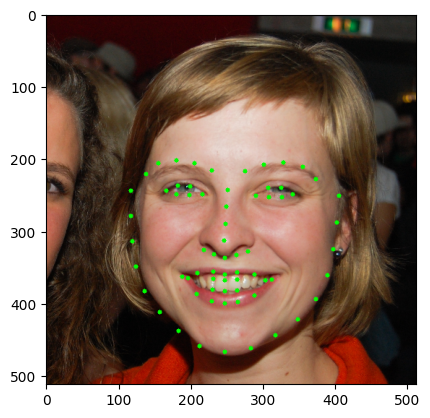

In [23]:
import cv2
import torch

# Загрузка изображения
image = cv2.imread("./test/images/00167.png")
original_h, original_w = image.shape[:2]

# Ресайз до 256x256
resized_image = cv2.resize(image, (256, 256))

# Преобразование в тензор для модели
image_tensor = torch.tensor(resized_image).float().permute(2, 0, 1).unsqueeze(0) / 255.0


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Нормализация
for i in range(3):
    image_tensor[0, i] = (image_tensor[0, i] - mean[i]) / std[i]

# Создаем экземпляр модели
model = LandmarkModel(base_model, num_landmarks)
model.eval()

# Загружаем веса из .pth файла
model.load_state_dict(torch.load("best_model.pth"))

model = model.to("cpu")

# Предсказание (предположим, что модель возвращает 68 точек)
with torch.no_grad():
    output = model(image_tensor)

# Обработка выхода (предположим, что output имеет форму [1, 136])
landmarks = output.squeeze().cpu().numpy()

# Разделение на x и y
landmarks_x = landmarks[::2]
landmarks_y = landmarks[1::2]

# Восстановление координат в исходном разрешении

landmarks_x *= original_h
landmarks_y *= original_w

# 8. Отображение точек на оригинальном изображении
for x, y in zip(landmarks_x, landmarks_y):
    cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig("model_output.jpg")
plt.show()




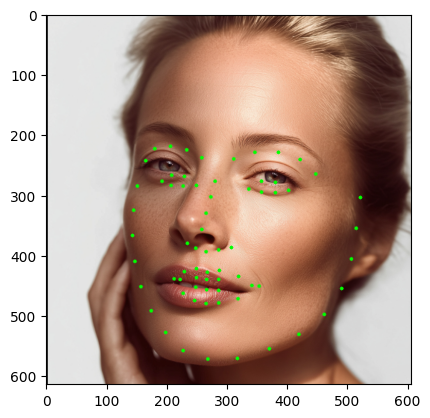

In [24]:
import onnxruntime as ort
import cv2
import torch
import matplotlib.pyplot as plt

sess_options = ort.SessionOptions()


onnx_model = "mobilenet_relu.onnx"

session = ort.InferenceSession(
    onnx_model, providers=["CPUExecutionProvider"], sess_options=sess_options
)
input_name = session.get_inputs()[0].name



image = cv2.imread("f2.png")
# image = cv2.imread("./test/images/04963.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h, original_w = image.shape[:2]

# Ресайз до 256x256
resized_image = cv2.resize(image, (256, 256))

# Преобразование в тензор для модели
image_tensor = torch.tensor(resized_image).float().permute(2, 0, 1).unsqueeze(0) / 255.0


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Нормализация
for i in range(3):
    image_tensor[0, i] = (image_tensor[0, i] - mean[i]) / std[i]


image_tensor_np = image_tensor.numpy()

predictions = session.run(None, {input_name: image_tensor_np})

landmarks = predictions[0][0] 

# Разделение на x и y
landmarks_x = landmarks[::2]
landmarks_y = landmarks[1::2]

# Восстановление координат в исходном разрешении
landmarks_x *= original_h
landmarks_y *= original_w

# 8. Отображение точек на оригинальном изображении
for x, y in zip(landmarks_x, landmarks_y):
    cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.imshow(image)

plt.savefig("model_output_onnx.jpg")
plt.show()
